# Econometrics Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
beta2 = lambda X, Y: np.sum((X - np.mean(X)) * (Y - np.mean(Y))) \
                     / np.sum((X - np.mean(X))**2)
beta1 = lambda X, Y: np.mean(Y) - beta2(X, Y) * np.mean(X)

In [2]:
t24 = {"X": np.arange(80, 260+20, 20),
       "Y": [70, 65, 90, 95, 110, 115, 120, 140, 155, 150]} 

t25 = {"X": np.arange(80, 260+20, 20),
       "Y": [55, 88, 90, 80, 118, 120, 145, 135, 145, 175]}

t24 = pd.DataFrame(t24)
t25 = pd.DataFrame(t25)

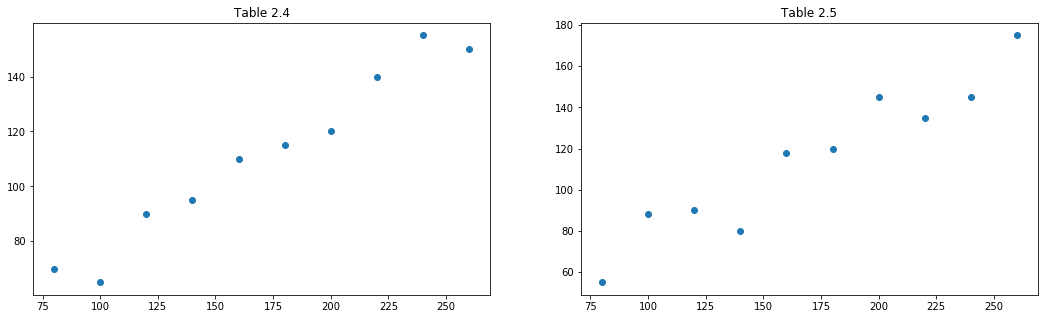

In [3]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
plt.scatter(t24.X, t24.Y)
plt.title("Table 2.4")

ax2 = fig.add_subplot(122)
plt.scatter(t25.X, t25.Y)
plt.title("Table 2.5")
plt.show()

# Regressing Tables

Given $X, Y \in \mathbb{R}^n $ , we regress $X$ on $Y$ using the formula
$$
    \beta_1 = \bar Y - \hat\beta_2 \bar X\\
    \beta_2 = \frac{\sum_i x_i y_i}{\sum_i x_i^2}
$$

where
- $x_i := X_i - \bar X$
- $y_i := Y_i - \bar Y$

## $\mathbb{V}ariances$
For $\beta_1$, $\beta_2$, $\epsilon$, their variances are given as:

$$\mathbb{V}(\epsilon) = \mathbb{E}[\epsilon^2]$$
$$\mathbb{V}(\beta_1) = \frac{\sum_i X_i^2}{\sum_i x_i^2}$$
$$\mathbb{V}(\beta_2) = \frac{\sigma^2}{\sum_i X_i ^ 2}$$

where
$$
    \sigma^2 = \frac{1}{n-2}\sum_i \epsilon_i^2
$$

## Table 2.5

In [5]:
t25["fit"] = beta1(**t25) + beta2(**t25) * t24.X

In [6]:
t25

,X,Y,fit
0,80,55,63.254545
1,100,88,74.775758
2,120,90,86.296970
3,140,80,97.818182
4,160,118,109.339394
5,180,120,120.860606
6,200,145,132.381818
7,220,135,143.903030
8,240,145,155.424242
9,260,175,166.945455


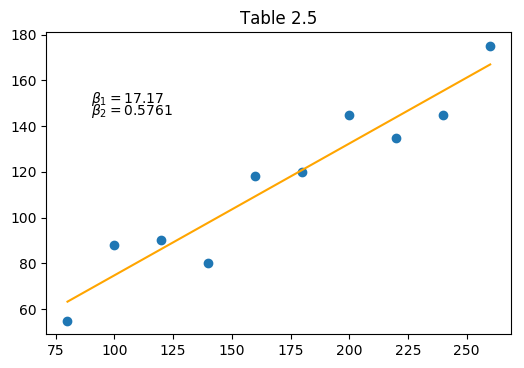

In [7]:
plt.figure(dpi=100)
plt.scatter(t25.X, t25.Y)
plt.title("Table 2.5")
beta1_25 = beta1(t25.X, t25.Y)
beta2_25 = beta2(t25.X, t25.Y)
plt.plot(t25.X, t25.fit, color="orange")
plt.text(90, 150, r"$\beta_1 = {}$".format(round(beta1_25, 2)))
plt.text(90, 145, r"$\beta_2 = {}$".format(round(beta2_25, 4)))
plt.show()

# Errors

In [8]:
t25["err"] = t25.fit - t25.Y

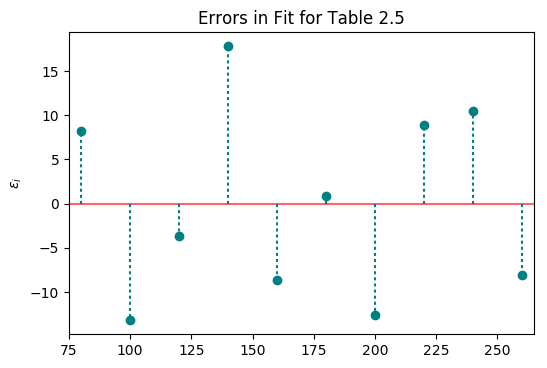

In [9]:
plt.figure(dpi=100)
plt.scatter(t25.X, t25.err, color="teal")
plt.hlines(0, min(t25.X)-5, max(t25.X)+5, alpha=0.6, color="red")
for e,x in zip(t25.err, t25.X):
    plt.plot((x, x), (0, e), color="teal", linestyle="dotted")
plt.xlim(min(t25.X)-5, max(t25.X)+5)
plt.title("Errors in Fit for Table 2.5")
plt.ylabel(r"$\epsilon_i$")
plt.show()

In [13]:
# Summary of errors
print("***Table 2.4***")
print("E[errs]={}".format(np.mean(t25.err)))
print("sigma(errs)={}".format(np.std(t25.err, ddof=2)))

***Table 2.4***
E[errs]=7.105427357601002e-16
sigma(errs)=11.521652869640054


In [24]:
np.mean(t24.err**2)

106.1987878787879

In [31]:
sum(t24.X**2) / sum((t24.X - np.mean(t24.X))**2)

9.7575757575757578

In [23]:
np.var**(t24.err)

106.1987878787879

In [ ]:
t25["fit"] = beta1(**t25) + beta2(**t25) * t25.X